# Flight Price Prediction

*Problem Statement:*

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

* Size of training set: 10683 records

* Size of test set: 2671 records

*FEATURES:*

* Airline: The name of the airline.

* Date_of_Journey: The date of the journey

* Source: The source from which the service begins.

* Destination: The destination where the service ends.

* Route: The route taken by the flight to reach the destination.

* Dep_Time: The time when the journey starts from the source.

* Arrival_Time: Time of arrival at the destination.

* Duration: Total duration of the flight.

* Total_Stops: Total stops between the source and destination.

* Additional_Info: Additional information about the flight

* Price: The price of the ticket

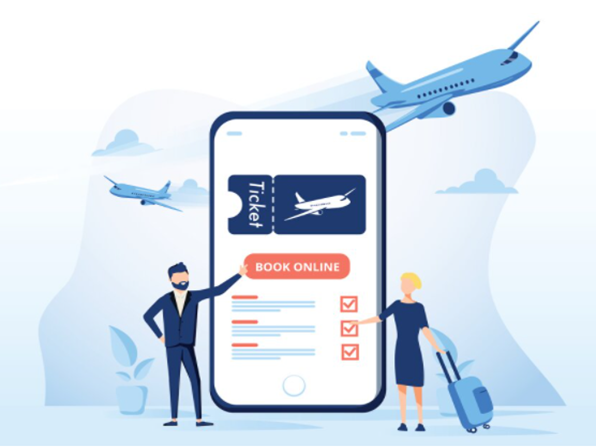

### Airlines use complex algorithms to calculate flight prices given the various conditions present at that particular time. These methods take into account financial, marketing and various social factors to predict flight prices.
### Airline ticket prices can be a difficult thing to guess, today we might see a price, check the price of the same flight tomorrow and it will be a different story.

# Problem Definition :- Build a machine learning model to predict the price of the flight ticket.
 
**Nowadays, the number of people using flights has increased significantly. It is difficult for airlines to hold prices as prices change dynamically due to different conditions.That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain. It can also help customers to predict future flight prices and plan their journey accordingly.**

**Importing Libraries**

In [3]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, power_transform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

**Data Collection and Information**

In [4]:
df_train = pd.read_excel(r"G:\datatrained\Flight_Ticket_Participant_Datasets/Data_Train.xlsx")

*I downloaded the zip file from the source on my local computer then extracted it's contents. I moved the extracted data to my working directory on the Jupyter Notebook and imported the excel spread sheet using pandas.*

In [5]:
df_train # checking the first 5 and last 5 rows of our dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


**Here we are taking a look at the first 5 and last 5 rows of our entire training data set. It looks like the only column that has proper numeric data is "Price" which is also our target column making all the remaining columns as our features using which we need to predict our label. Since the values present in the "Price" column has continous data it makes this to be a Regression problem!**

# Exploratory Data Analysis (EDA)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


*Using the info method we can see that there is only 1 column with integer data type and 10 columns that have object data type.*

In [7]:
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


*With the help of "describe" method we can see details for only numeric data type and since we have just 1 column with integer data type all the object data type columns got ignored. In the "Price" column we are able to take a look at the number of rows covered in our dataset being displayed in the count area, then we have the mean and standard deviation being reflected for our label column. Later on the values of minimum, 25% quartile, 50% quartile, 75% quartile and maximum number are being displayed above.*

In [8]:
df_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

*In the above cell we are taking a look at null values and there are 2 columns "Route" and "Total_Stops" that have missing data.*

<AxesSubplot:>

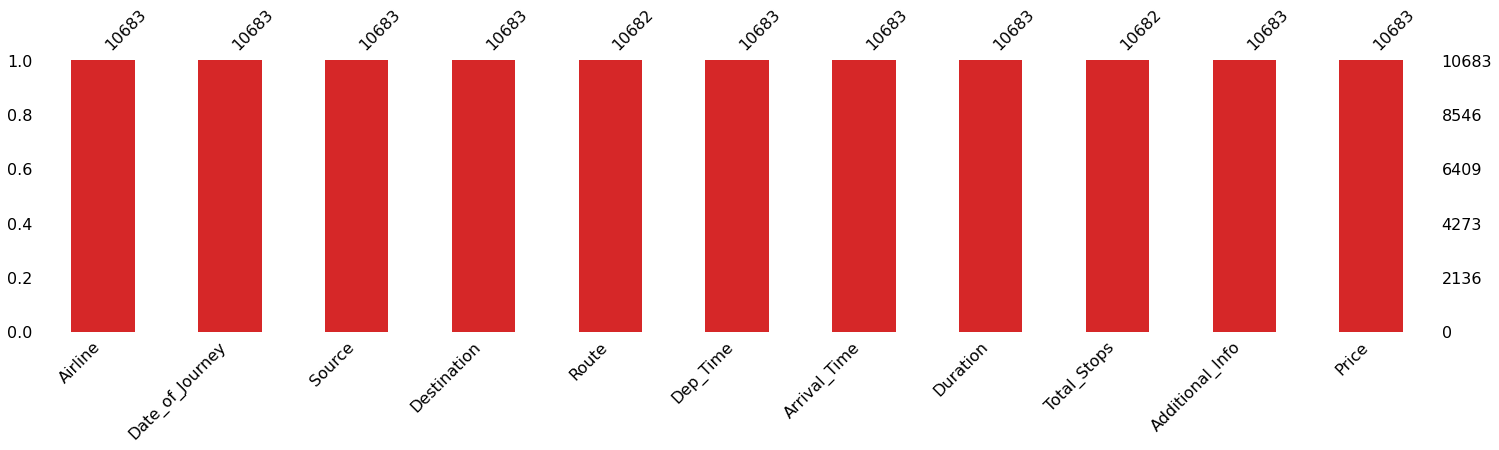

In [9]:
missingno.bar(df_train, figsize = (25,5), color="tab:red")

*We are able to depict the missing values information in a bar plot format where we can clearly see the columns that have all the rows filled with data and the two columns that have a single row of null values present in them.*

In [10]:
print(f"Rows and Columns before dropping duplicates: ", df_train.shape)
df_train.drop_duplicates(inplace=True)
print(f"Rows and Columns after dropping duplicates: ", df_train.shape)

Rows and Columns before dropping duplicates:  (10683, 11)
Rows and Columns after dropping duplicates:  (10463, 11)


*In the above cell I have removed all the duplicate rows and checked for the row and column information.*

In [11]:
print(f"Rows and Columns before dropping null values: ", df_train.shape)
df_train.dropna(inplace=True)
print(f"Rows and Columns after dropping null values: ", df_train.shape)

Rows and Columns before dropping null values:  (10463, 11)
Rows and Columns after dropping null values:  (10462, 11)


*In the above cell I have removed all the null valued rows and checked for the row and column information.*

In [12]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

*Great now we have no missing data present in our training dataset. Also we have taken care of duplicate rows that were present in our dataset.*

In [13]:
df_train.nunique().to_frame("Unique Values")

,Unique Values
Airline,12
Date_of_Journey,44
Source,5
Destination,6
Route,128
Dep_Time,222
Arrival_Time,1343
Duration,368
Total_Stops,5
Additional_Info,10


*In the above cell we can see the list of all the columns and how many unique values they hold.*

In [14]:
def date_bifurcation(df):
    df=df.copy()
    df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
    df['Year_of_Journey']=df['Date_of_Journey'].dt.year
    df['Month_of_Journey']=df['Date_of_Journey'].dt.month
    df['Day_of_Journey']=df['Date_of_Journey'].dt.day
    df=df.drop(['Route', 'Date_of_Journey', 'Duration'],axis=1)
    return df

df_train = date_bifurcation(df_train)
print(f"Rows and Columns:", df_train.shape)
df_train.head()

Rows and Columns: (10462, 11)


,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Year_of_Journey,Month_of_Journey,Day_of_Journey
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,05:50,13:15,2 stops,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,2 stops,No info,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,1 stop,No info,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,1 stop,No info,13302,2019,1,3


*I have created a function that basically separates the date information into proper numerical format instead of making it an object datatype. Also I have dropped the Date of Journey column since it's data was already bifurcated, then I removed the Route column as we have source and destination data so Route was not adding much of an insight and finally I removed the Duration column as later on I have time separations to deal with as well.*

In [15]:
def time_bifurcation(df):
    df['Departure_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
    df['Departure_minute']=pd.to_datetime(df['Dep_Time']).dt.minute
    df=df.drop(['Dep_Time'],axis=1)
    df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
    df['Arrival_minute']=pd.to_datetime(df['Arrival_Time']).dt.minute
    df=df.drop(['Arrival_Time'],axis=1)
    return df

df_train = time_bifurcation(df_train)
print(f"Rows and Columns:", df_train.shape)
df_train.head()

Rows and Columns: (10462, 13)


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Year_of_Journey,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,2019,1,3,16,50,21,35


*In the above cell I have created another function that deals with the separation on timings for arrival and departure. This allows me to get a proper insight on the flight duration details as well tehrefore I got rid of the duration column earlier.*

In [16]:
df_train.nunique().to_frame("Unique Values")

,Unique Values
Airline,12
Source,5
Destination,6
Total_Stops,5
Additional_Info,10
Price,1870
Year_of_Journey,1
Month_of_Journey,7
Day_of_Journey,9
Departure_hour,24


*Taking a look at all the column names that have been created and retained after pre processing our original data frame.*

In [17]:
df_train.drop("Year_of_Journey", axis=1, inplace=True)

*I am dropping the column named "Year_of_Journey" as it only has one uniqye value covering all the rows in the column and therefore it wont add much value to our prediction model later.*

# Visualization

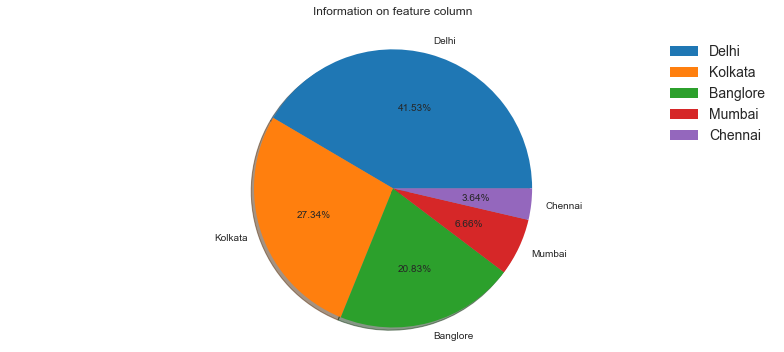

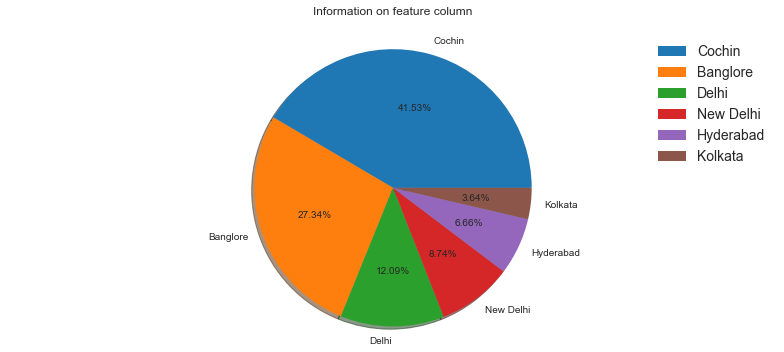

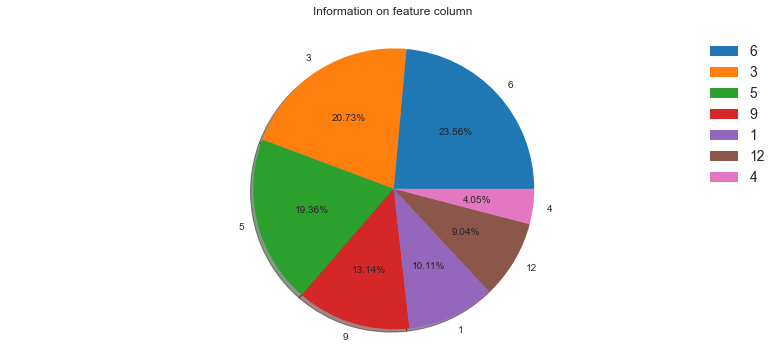

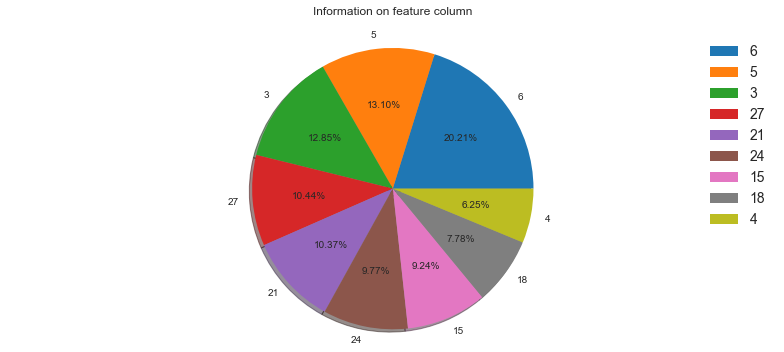

In [20]:
def generate_pie(x):
    plt.style.use('seaborn-white')
    plt.figure(figsize=(11,5))
    plt.pie(x.value_counts(), labels=x.value_counts().index, shadow=True, autopct='%1.2f%%')
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.title('Information on feature column\n')
    plt.tight_layout()
    return plt.show()

generate_pie(df_train['Source'])
generate_pie(df_train['Destination'])
generate_pie(df_train['Month_of_Journey'])
generate_pie(df_train['Day_of_Journey'])

**I have created a function to generate pie plots for our feature columns. My observation for them are:**

1. In the source column we have the highest number of rows covered by Delhi and the lowest number of rows covered by Chennai.
2. In the destination column we have the highest number of rows covered by Cochin and the lowest number of rows covered by Kolkata.
3. We see that in our data set that most of the journey made by people were in the month of June and least in the month of April.
4. We also see that in our data set that most of the journey made by people were on dates 6,5 and the least travelling dates were for 4,18.

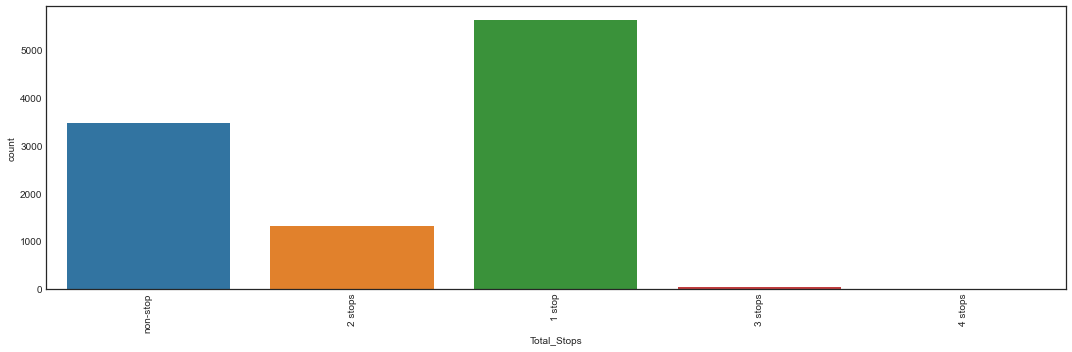

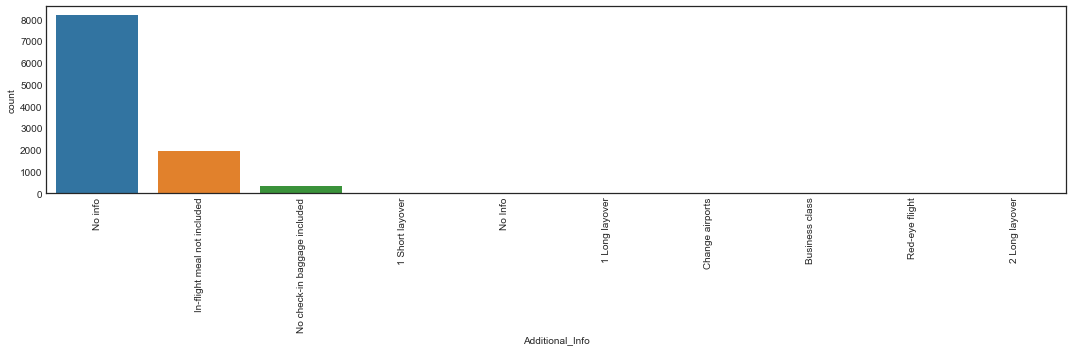

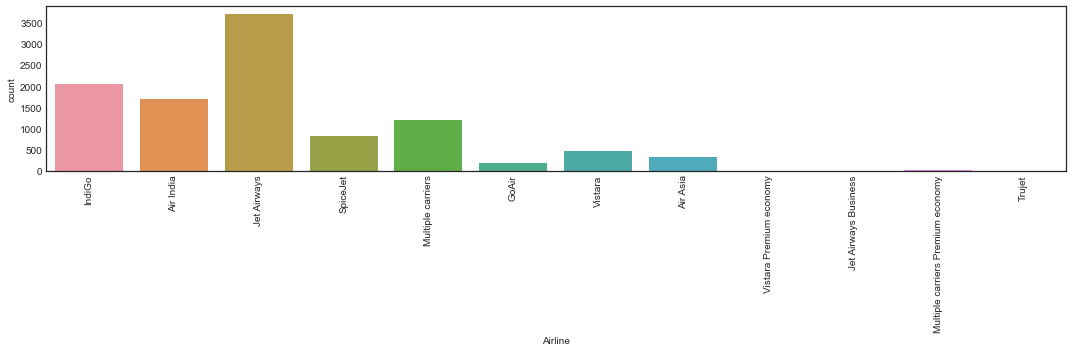

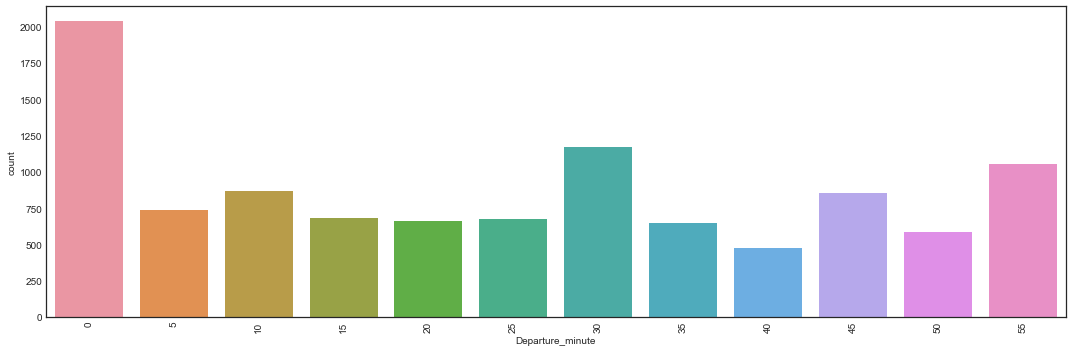

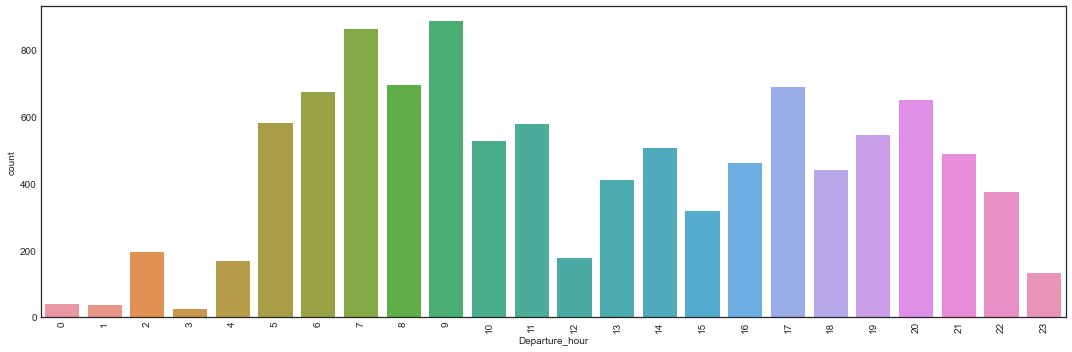

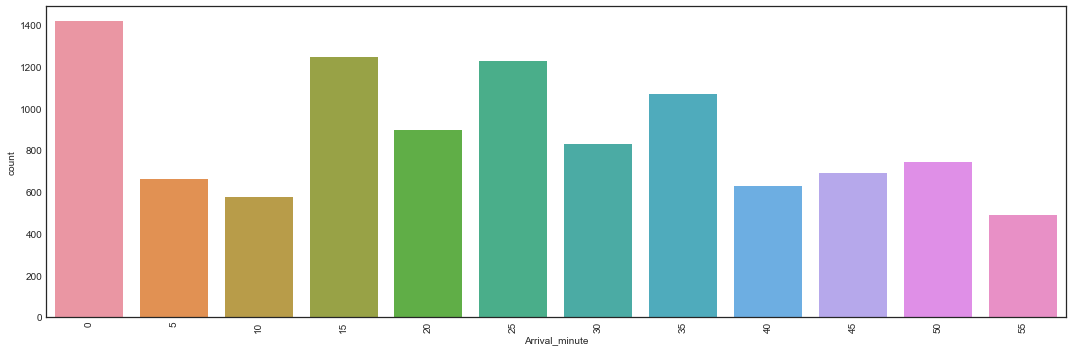

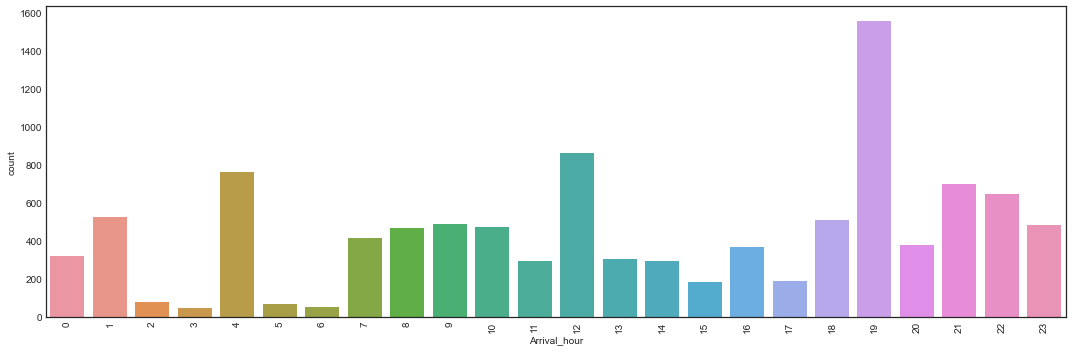

In [22]:
def generate_countplot(x):
    plt.figure(figsize=(15,5))
    sns.countplot(x)
    plt.xticks(rotation=90)
    plt.tight_layout()
    return plt.show()

generate_countplot(df_train['Total_Stops'])
generate_countplot(df_train['Additional_Info'])
generate_countplot(df_train['Airline'])
generate_countplot(df_train['Departure_minute'])
generate_countplot(df_train['Departure_hour'])
generate_countplot(df_train['Arrival_minute'])
generate_countplot(df_train['Arrival_hour'])

**I have created a function to generate count plots for our feature columns. My observation for them are:**

1. In the total stops column we see highest count of rows covered by 1 stop flight hauls and the least numbers are for 3 and 4 stops.
2. In additional information column most number of rows are covered by no info values and rest of the values cover very less to negligible data points.
3. The airline column shows that highest number of flight details are present in our dataset for Jet Airways followed by Indigo and Air India.
4. The departure minute column gives us the indication that most number of flights get scheduled at 0 minutes for departure.
5. The departure hour column gives us the indication that most number of flights get scheduled at 7 and 9 hour morning time and then there is a spike at 17 and 20 hour evening time.
6. The arrival minute column gives us the indication that most number of flights get scheduled at 0 minutes for arrival.
7. The arrival hour column gives us the indication that most number of flights get scheduled at 19 hour in the evening and then the chosen option for arrivals are 12 in the noon or 4 in the night.

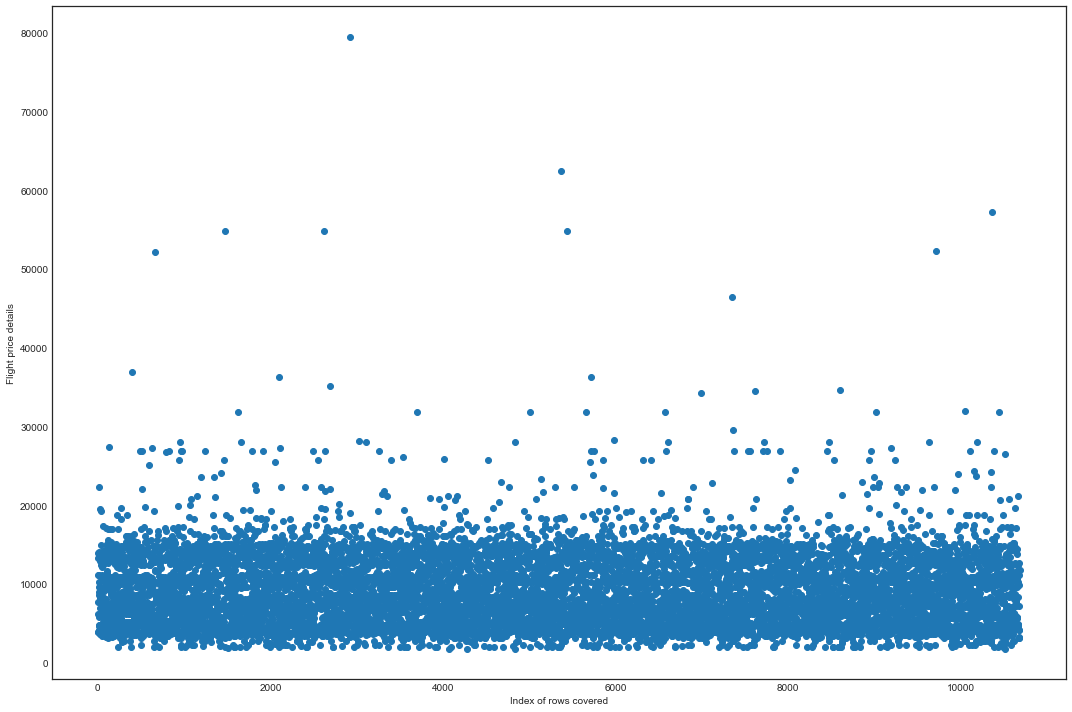

In [23]:
plt.style.use('fast')
plt.figure(figsize=(15,10))
plt.scatter(df_train.index, df_train['Price'])
plt.xlabel("Index of rows covered")
plt.ylabel("Flight price details")
plt.tight_layout()
plt.show()

*In the above scatter plot we are able to see that most of the flight price values are accumulated between 0-20000 and very rare data points are distributed abov that number.*

<AxesSubplot:xlabel='Source', ylabel='Price'>

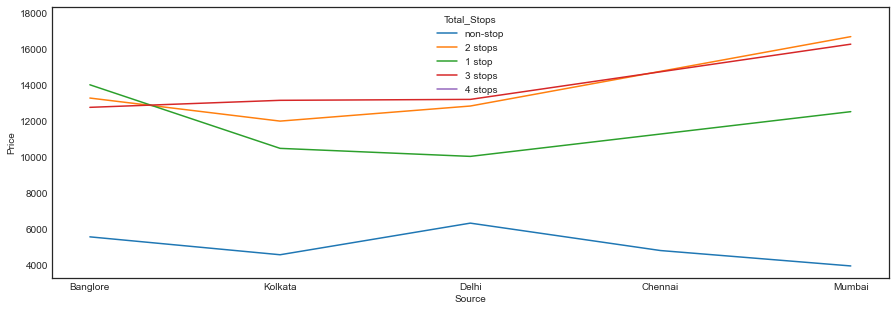

In [25]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Source', y='Price', hue='Total_Stops', data=df_train, ci=None)

*In the above line plot we see that non stop flights have lower price irrespective of the source as compared to flights that have 1 or more than 1 stops in the fligh haul.*

<AxesSubplot:xlabel='Destination', ylabel='Price'>

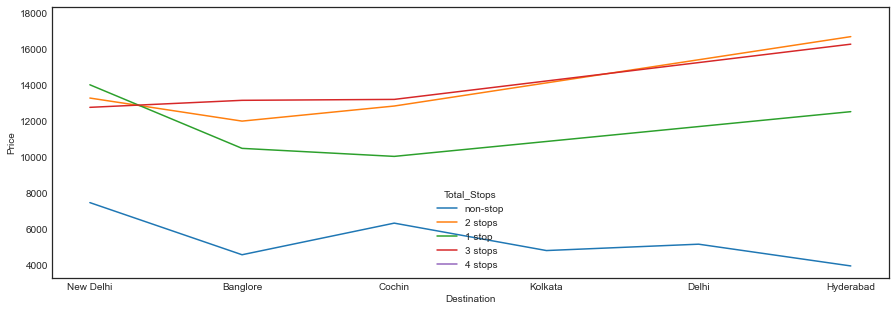

In [26]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Destination', y='Price', hue='Total_Stops', data=df_train, ci=None)

*In the above line plot we see that non stop flights have lower price irrespective of the destination as compared to flights that have 1 or more than 1 stops in the fligh haul.*

<AxesSubplot:xlabel='Month_of_Journey', ylabel='Price'>

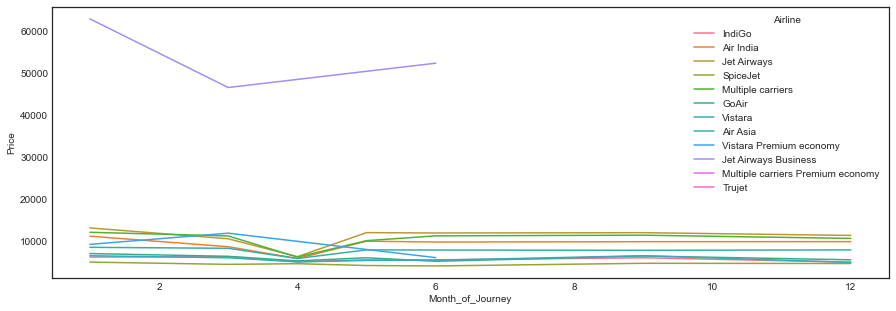

In [27]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Month_of_Journey', y='Price', hue='Airline', data=df_train, ci=None)

*In the above line plot we see that Jet Airways Business class has the highest price than the rest possibly because the remaining offer the economy class data.*

<AxesSubplot:xlabel='Day_of_Journey', ylabel='Price'>

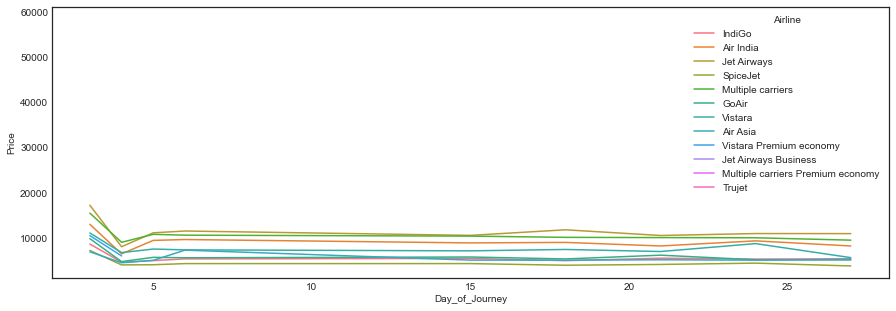

In [28]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Day_of_Journey', y='Price', hue='Airline', data=df_train, ci=None)

*In the above line plot we see that all the airlines have high price between 1-5 days of a month and that reduces a bit on rest of the days apart from them.*

<AxesSubplot:xlabel='Departure_minute', ylabel='Price'>

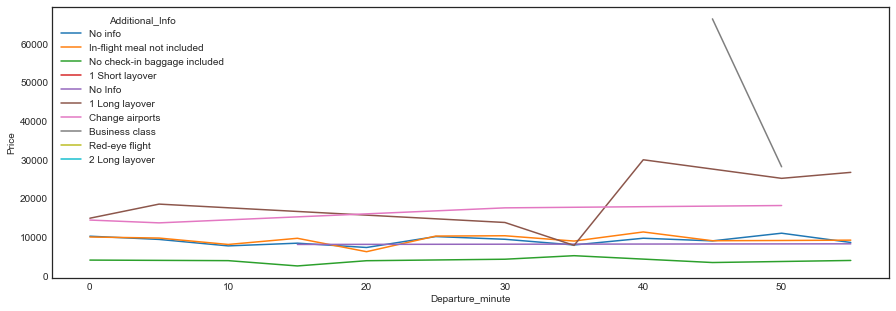

In [29]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Departure_minute', y='Price', hue='Additional_Info', data=df_train, ci=None)

*In the above line plot we see that Business class has high price and has data coverage for departure minutes between 45-50 minutes roughly.*

<AxesSubplot:xlabel='Departure_hour', ylabel='Price'>

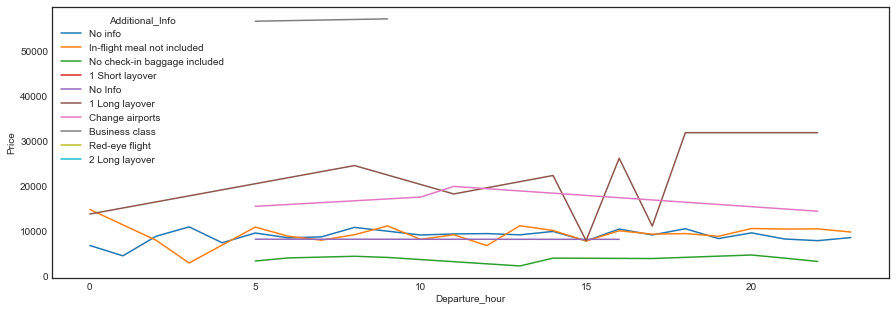

In [30]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Departure_hour', y='Price', hue='Additional_Info', data=df_train, ci=None)

*In the above line plot we see that business class has high price and it's departure hour is between 5-10 but the second highest pricing is for 1 long layover type with spike in between 17-22 departure hour.*

<AxesSubplot:xlabel='Arrival_minute', ylabel='Price'>

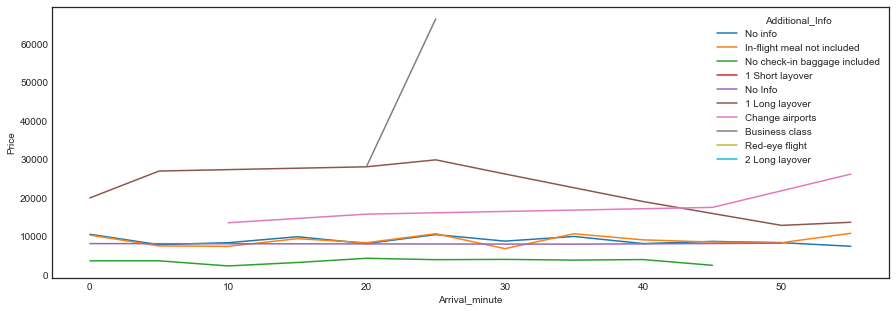

In [31]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Arrival_minute', y='Price', hue='Additional_Info', data=df_train, ci=None)

*In the above line plot we see that business class again has an exponential price rise and the arrival minutes mostly range between 20-30 minutes*

<AxesSubplot:xlabel='Arrival_hour', ylabel='Price'>

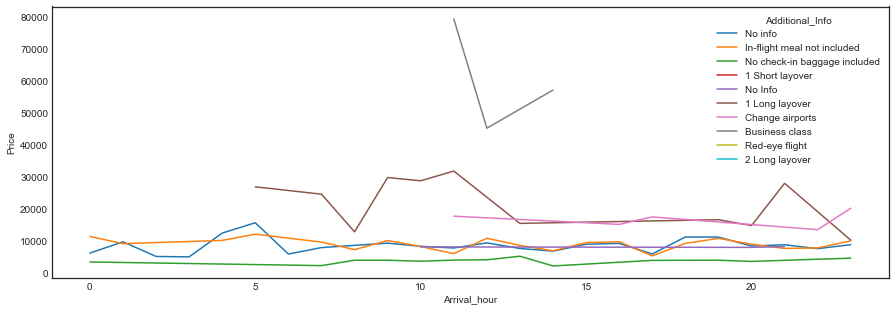

In [32]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Arrival_hour', y='Price', hue='Additional_Info', data=df_train, ci=None)

*In the above line plot we see that price for no check-in bag included is least as compared to the business class being highest and the arrival hour for business class is spread only between 10-15 minutes*

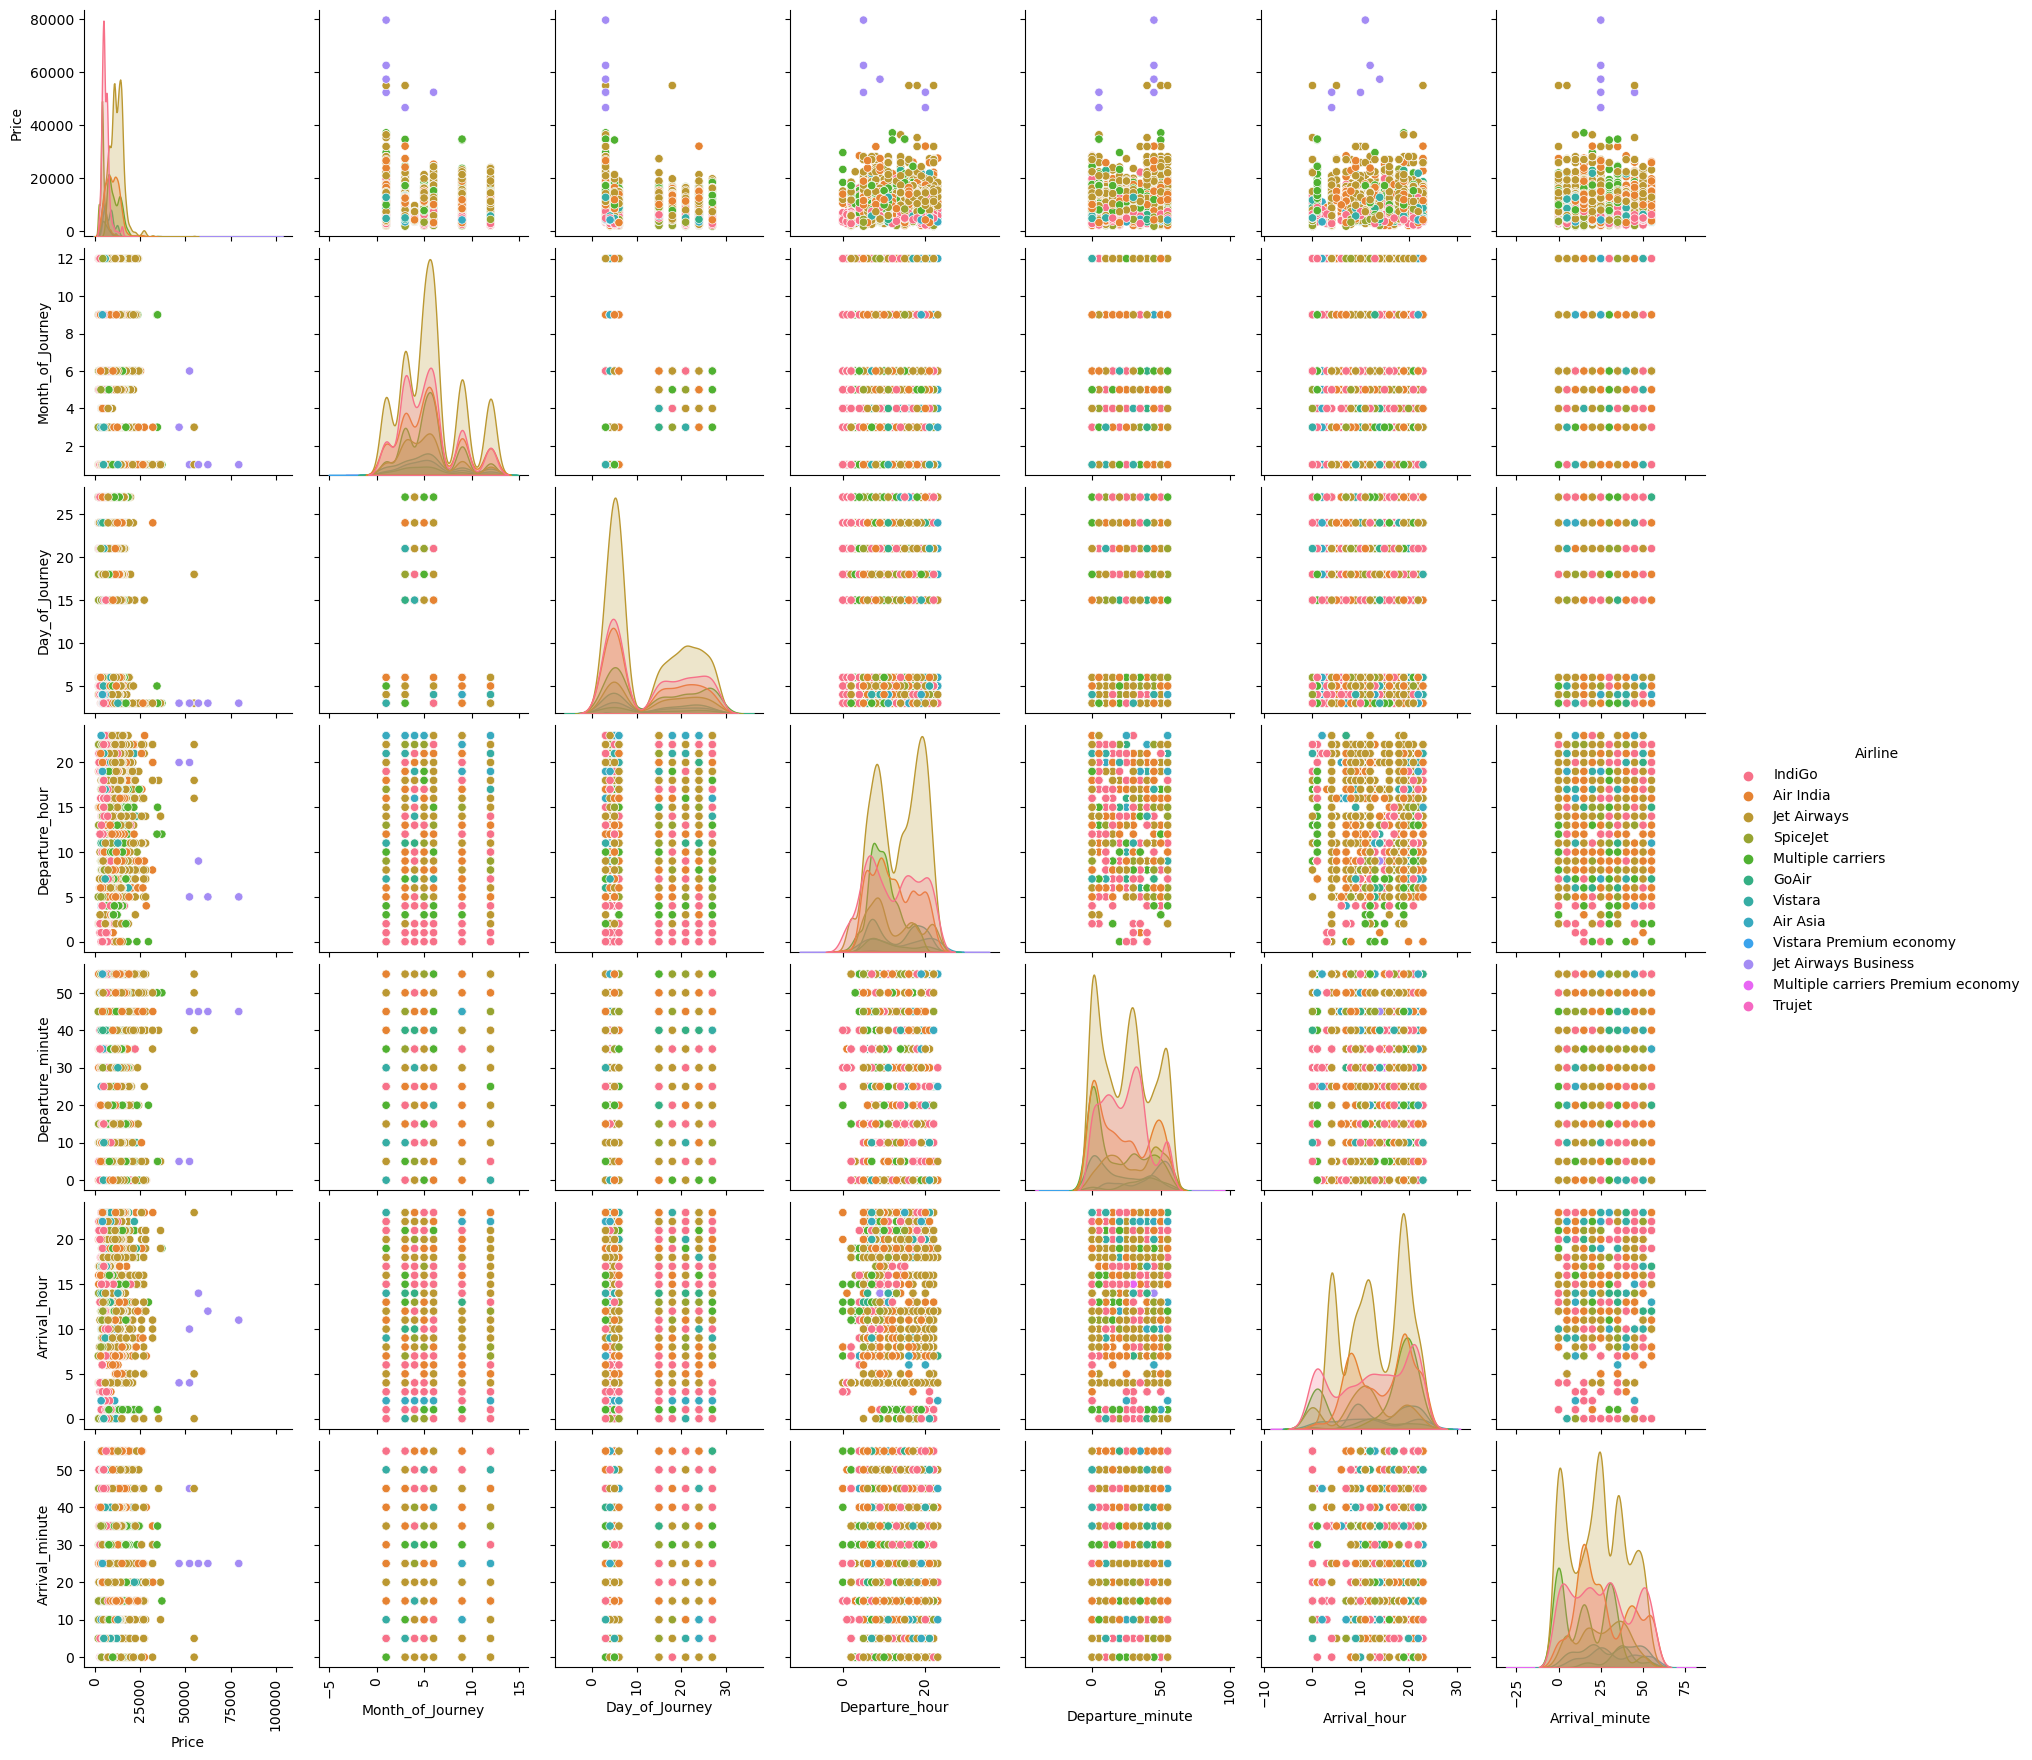

In [33]:
plt.style.use('default')
g = sns.pairplot(df_train, hue='Airline', diag_kind='kde')
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

*The above paiplot gives us an indication on the numerical data considering the different airlines present in our dataset.*

# Encoding the categorical object datatype columns

In [34]:
oe=OrdinalEncoder()
def ordinal_encoder(df, col):
    df[col]=oe.fit_transform(df[col])
    return df

df_train=ordinal_encoder(df_train,['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info'])

*I am using the OrdinalEncoder method for encoding my categorical features since they all are present in an orderly format and will not increase the number of columns like in the usage of One Hot Encoding.*

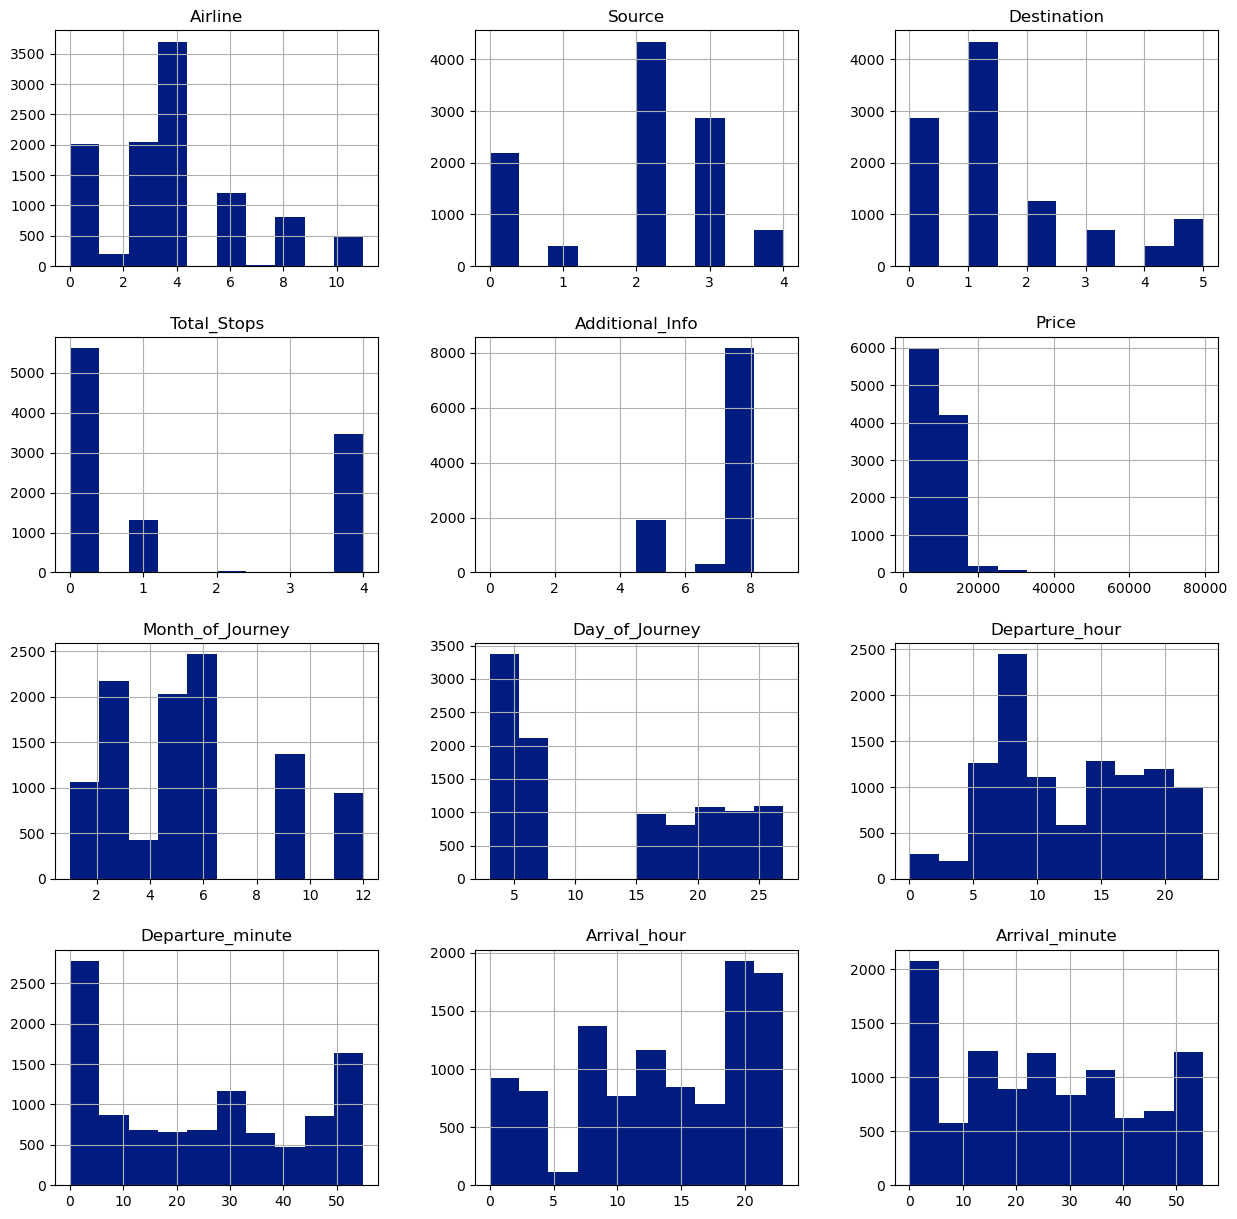

In [35]:
plt.style.use('seaborn-dark-palette')
df_train.hist(figsize=(15,15))
plt.show()

*With the help of above histogram we are able to see the data distribution in our columns after the encoding technique was applied on all the categorical columns.*

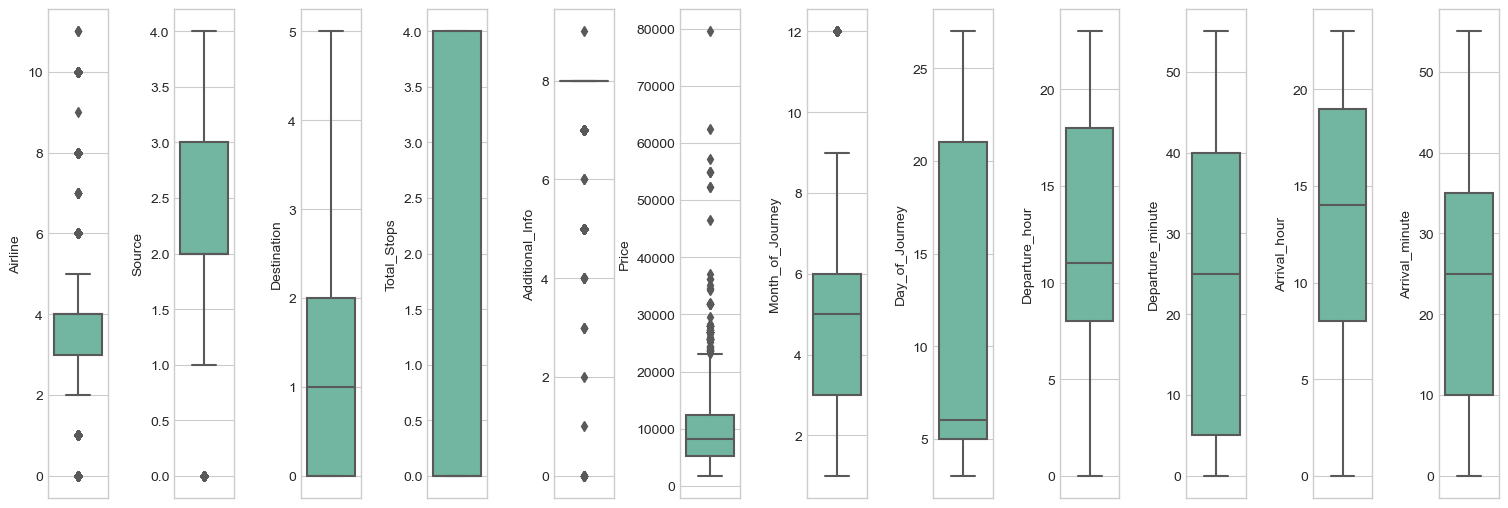

In [36]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(ncols=12, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df_train.items():
    sns.boxplot(y=col, data=df_train, ax=ax[index], palette="Set2")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

*Using the box plot we are able to notice the outliers present in our dataset but since all of the feature columns are categorical data we will not have to worry about the presence of outliers here.*

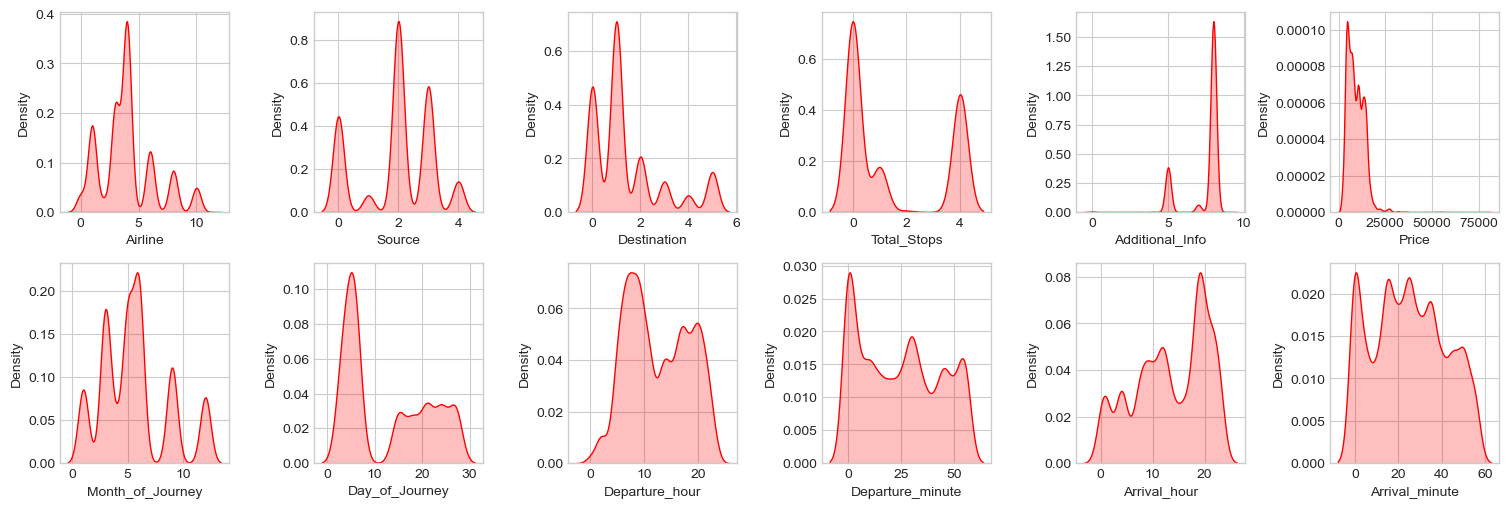

In [37]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df_train.items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

*Just like in the case of outliers with the help of above distribution plots on our dataset gives us an indication on presence of skewness in our columns however for categorical data columns we do not have to worry about the outliers or the skewness in them.*

# Correlation using a Heatmap

* Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
* Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

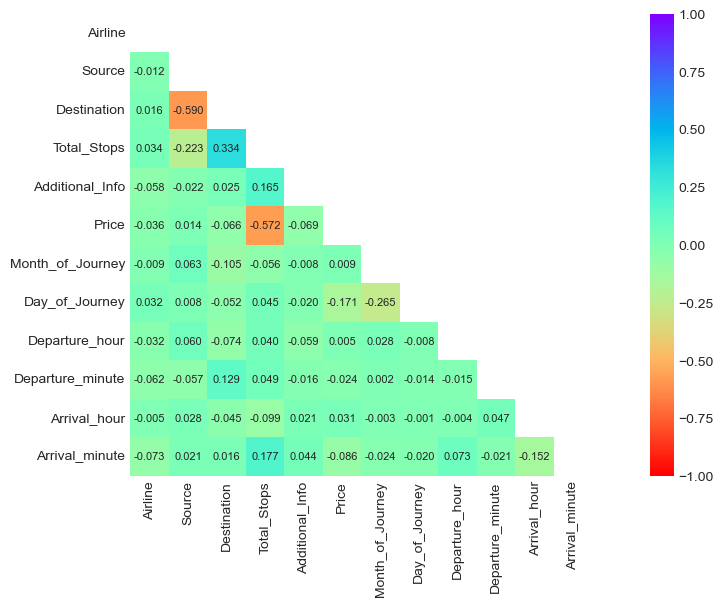

In [38]:
plt.style.use('seaborn-pastel')
upper_triangle = np.triu(df_train.corr())
plt.figure(figsize=(15,6))
sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':8}, cmap="rainbow_r", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

*With the help of about heatmap we are able to notice the correlation details between our label and feature and also amongst our labels. After eye balling the above heatmap we can see that there are no multi collinearity concerns in our dataset so we won't have to worry about dealing with them.*

# Correlation Bar Plot comparing features with our label

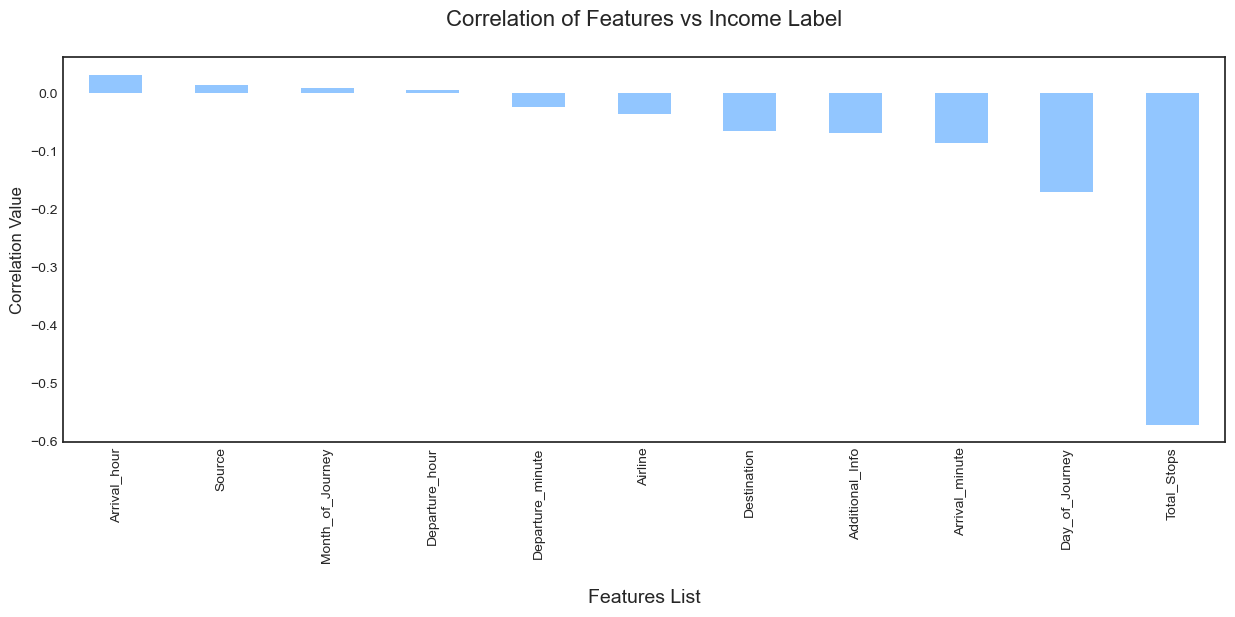

In [39]:
plt.style.use('seaborn-white')
df_corr = df_train.corr()
plt.figure(figsize=(15,5))
df_corr['Price'].sort_values(ascending=False).drop('Price').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

*With the usage of above bar plot for viewing the correlation information between our Features and Label we can see that only columns arrival hour, source, month of journey and departure hours are positively correlated with our target and remaining all our feature columns are negatively correlated where total stops is highly negatively correlated indicating that as the number of total stops in an itinerary increases the price of that particular flight increases and vice a versa.*

# Splitting the dataset into 2 variables namely 'X' and 'Y' for features and label

In [40]:
X = df_train.drop('Price', axis=1)
Y = df_train['Price']

*I have separated the dataset into features and label where X represents all the feature columns and Y represents the regression target label column.*

# Feature Scaling

In [41]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head() # Displaying all the features after applying scaling technique to avoid bias output

,Airline,Source,Destination,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,-0.414916,-1.646877,2.404213,1.392916,0.497963,-0.846221,1.293326,1.662578,-0.234123,-1.807045,-0.888367
1,-1.260756,0.882057,-0.972012,-0.254274,0.497963,-1.513956,-0.867922,-1.305841,1.360364,-0.056554,-0.586611
2,0.008004,0.039079,-0.296767,-0.254274,0.497963,1.156984,-0.754172,-0.607390,0.031625,-1.369422,0.016902
3,-0.414916,0.882057,-0.972012,-0.803337,0.497963,2.158586,-0.867922,0.964126,-1.031367,1.402189,0.318658
4,-0.414916,-1.646877,2.404213,-0.803337,0.497963,-1.513956,-1.095422,0.614900,1.360364,1.110440,0.620415


*I am using the StandardScaler method to normalize my feature values and ensure that my regression model does not have any kind of biasness towards a particular column value*.

# Finding the best random state for building Regression Models

In [42]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 0.4194390126695826 on Random State 754


*with the help of random state selection process we have found our lucky number to be 754 amongst 1-1000.*

# Feature importance bar graph

,Importance
Features,
Total_Stops,0.424
Airline,0.144
Day_of_Journey,0.127
Month_of_Journey,0.072
Additional_Info,0.065
Arrival_hour,0.042
Departure_hour,0.039
Departure_minute,0.030
Arrival_minute,0.024


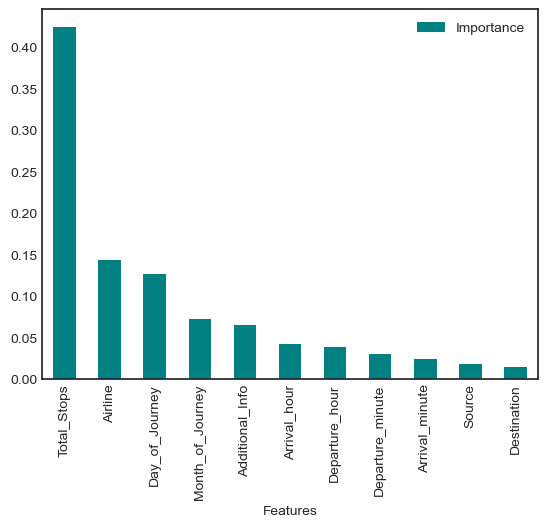

In [43]:
rf=RandomForestRegressor()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

*Here with the help of RandomForestRegressor we are able to list down the importance or priority given to a column as per it's involvement or weightage in predicting our label.*

# Machine Learning Model for Regression with Evaluation Metrics

In [44]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=754)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

*I have built a regression function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.*

In [45]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 3253.245213499442
R2 Score is: 41.94390126695826
Cross Validation Score: 37.028436757605974
R2 Score - Cross Validation Score is 4.915464509352283


*Created the linear regression model and checked for all it's evaluation metrics as well.*

In [46]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 3252.0945411831326
R2 Score is: 41.9849628697702
Cross Validation Score: 37.02502409742235
R2 Score - Cross Validation Score is 4.959938772347847


*Created the ridge regression model and checked for all it's evaluation metrics as well.*

In [50]:
# Lasso Regression

model=Lasso(alpha=1e-2, normalize=True, max_iter=15)
reg(model, X, Y)

RMSE Score is: 3253.0465046164677
R2 Score is: 41.950993207130836
Cross Validation Score: 37.028435460972034
R2 Score - Cross Validation Score is 4.922557746158802


*Created the lasso regression model and checked for all it's evaluation metrics as well.*

In [51]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 4217.930182317322
R2 Score is: 2.408268550434034
Cross Validation Score: 2.1075676061836135
R2 Score - Cross Validation Score is 0.3007009442504205


*Created the support vector regression model and checked for all it's evaluation metrics as well.*

In [52]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 1963.137378430306
R2 Score is: 78.85948153600039
Cross Validation Score: 83.03876445447456
R2 Score - Cross Validation Score is -4.179282918474172


*Created the decision tree regression model and checked for all it's evaluation metrics as well.*

In [53]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 3024.735087970709
R2 Score is: 49.813265503349726
Cross Validation Score: 44.53522215303558
R2 Score - Cross Validation Score is 5.278043350314142


*Created the random forest regression model and checked for all it's evaluation metrics as well.*

In [54]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 3012.9333331877874
R2 Score is: 50.204133483830596
Cross Validation Score: 44.49625881344096
R2 Score - Cross Validation Score is 5.707874670389636


*Created the k neighbors regression model and checked for all it's evaluation metrics as well.*

In [55]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 2458.45787673627
R2 Score is: 66.84570536347161
Cross Validation Score: 67.05919756000027
R2 Score - Cross Validation Score is -0.21349219652866225


*Created the gradient boosting regression model and checked for all it's evaluation metrics as well.*

In [56]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 3066.187569306349
R2 Score is: 48.42827158308161
Cross Validation Score: 32.32037483858014
R2 Score - Cross Validation Score is 16.107896744501467


*Created the ada boost regression model and checked for all it's evaluation metrics as well.*

In [57]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 1409.9056701352547
R2 Score is: 89.09578605533062
Cross Validation Score: 86.96003329523458
R2 Score - Cross Validation Score is 2.1357527600960395


*Created the extra trees regression model and checked for all it's evaluation metrics as well.*

In [58]:
# XGB Regressor

model=XGBRegressor()
reg(model, X, Y)

RMSE Score is: 1408.8013601931516
R2 Score is: 89.11286083744568
Cross Validation Score: 89.31337098569448
R2 Score - Cross Validation Score is -0.20051014824879587


*Created the XGB regression model and checked for all it's evaluation metrics as well.*

In [59]:
# LGBM Regressor

model=LGBMRegressor()
reg(model, X, Y)

RMSE Score is: 1386.5943462397358
R2 Score is: 89.45338482387285
Cross Validation Score: 86.38669818049202
R2 Score - Cross Validation Score is 3.0666866433808337


*Created the LGBM regression model and checked for all it's evaluation metrics as well.*

# Hyper parameter tuning on the best Regression ML Model

In [60]:
# Choosing XGB Regressor

fmod_param = {'booster' : ['gbtree','dart','gblinear'],
              'importance_type' : ['gain','split'],
              'n_estimators' : [100,200,500],
              'eta' : [0.001, 0.01, 0.1]
             }

*I have chosen the XGB regressor as my best model since it is able to provide me the highest R2 score plus the model is doing better in Cross validation score too. In the above cell I have listed all the parameters for XGB regressor that can be used for hyper tuning our final model.*

In [61]:
GSCV = GridSearchCV(XGBRegressor(), fmod_param, cv=5)

*Here we are using the Grid Search CV method to perform the hyper tuning mechanism.*

In [62]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'booster': ['gbtree', 'dart', 'gblinear'],
                         'eta': [0.001, 0.01, 0.1],
                         'importance_type': ['gain', 'split'],
                         'n_estimators': [100, 200, 500]})

*We are training our model by providing all the parameters we deem fit so it can go through all the permutations and combinations and identify the best value.*

In [63]:
GSCV.best_params_

{'booster': 'dart', 'eta': 0.1, 'importance_type': 'gain', 'n_estimators': 500}

*In the above cell we have received the entire list of parameters after training our model by giving it different inputs and choosing the best one out of them.*

In [64]:
Final_Model = XGBRegressor(booster='dart', eta=0.1, importance_type='gain', n_estimators=500)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 87.55683252006776


*We have built our final model using the hyper tuned parameters which look like it is not doing better than the default values but it can always be tuned better to get better results.*

# Saving the best Regression ML model

In [65]:
filename = "FinalModel_fp.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_fp.pkl']

**Finally I have saved my best Regression model using the joblib library.**

# Loading testing data

In [66]:
df_test = pd.read_excel(r"G:\datatrained\Flight_Ticket_Participant_Datasets/Test_set.xlsx")
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


*I have imported the testing dataset now that only consists of feature columns and we need to predict the target label. However before we apply our final regression model we will need to perform all the pre processing steps that were applied on our training dataset.*

In [67]:
df_test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

*Taking a look at missing value information in our testing dataset. Luckily we do not have any null values present for our testing dataset which means we don't have to worry about handling them either.*

In [68]:
print(f"Rows and Columns before dropping duplicates: ", df_test.shape)
df_test.drop_duplicates(inplace=True)
print(f"Rows and Columns after dropping duplicates: ", df_test.shape)

Rows and Columns before dropping duplicates:  (2671, 10)
Rows and Columns after dropping duplicates:  (2645, 10)


*We are removing all the duplicate rows from our testing dataset using the drop_duplicates option.*

In [69]:
df_test = date_bifurcation(df_test)
print(f"Rows and Columns:", df_test.shape)
df_test.head()

Rows and Columns: (2645, 10)


,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Year_of_Journey,Month_of_Journey,Day_of_Journey
0,Jet Airways,Delhi,Cochin,17:30,04:25 07 Jun,1 stop,No info,2019,6,6
1,IndiGo,Kolkata,Banglore,06:20,10:20,1 stop,No info,2019,12,5
2,Jet Airways,Delhi,Cochin,19:15,19:00 22 May,1 stop,In-flight meal not included,2019,5,21
3,Multiple carriers,Delhi,Cochin,08:00,21:00,1 stop,No info,2019,5,21
4,Air Asia,Banglore,Delhi,23:55,02:45 25 Jun,non-stop,No info,2019,6,24


*Using the date_bifurcation function we are able separate the date information and dropping all the unnecessary columns as well.*

In [70]:
df_test = time_bifurcation(df_test)
print(f"Rows and Columns:", df_test.shape)
df_test.head()

Rows and Columns: (2645, 12)


,Airline,Source,Destination,Total_Stops,Additional_Info,Year_of_Journey,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,1 stop,No info,2019,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,1 stop,No info,2019,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,2019,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,1 stop,No info,2019,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,non-stop,No info,2019,6,24,23,55,2,45


*Using the time_bifurcation function we are separating time related values and creating additional columns from them.*

In [71]:
df_test.drop("Year_of_Journey", axis=1, inplace=True)
df_test=ordinal_encoder(df_test, ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info'])

*Now we are applying Ordinal Encoder technique since we have all our feature columns with an order category and it becomes easier to convert than the usage of One Hot Encoding method.*

In [72]:
df_test = pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns)

*With the usage of StandardScaler we have transformed all our feature values in a normalized format to avoid biases in our regression model.*

In [73]:
predited_values = Final_Model.predict(df_test)
data = pd.DataFrame(predited_values, columns=['Predicted Flight Prices'])
data

,Predicted Flight Prices
0,14110.669922
1,4543.466309
2,12488.573242
3,10740.701172
4,3604.916504
...,...
2640,10002.468750
2641,4299.227539
2642,16538.347656
2643,12429.273438


**Here we are using our best model algorithm to predict the target label and show it in a dataframe. This information can also be exported in a spread sheet if required.**